### Dec 6th, Thursday, Summary
- The feature table with 13 columns is replicated by row corresponding to the number of available exposure in each fiber

- The exposure index column is added as the 14th column

- Exposure data matrix with 4128 columns is intended to be add as extra columns to the feature matrix. The index and value are not approriately understood by the current concatenation method. Modification is needed.

- Next step: automation for all exposure across fibers and convert to HDF5 file.

### Initialization

#### Bossdata

In [2]:
import bossdata
print(bossdata.__version__)

0.3.1


In [3]:
import bossdata.path
import bossdata.remote
import bossdata.meta as meta
import bossdata.spec as spec
import bossdata.plate as plate

#### Astropy

In [4]:
import astropy.io.fits as fits
from astropy.table import unique,Table

#### Pandas

In [426]:
import pandas as pd

#### Numpy

In [282]:
import numpy as np

#### HDPF5
Hierarchical Data Format

In [408]:
import h5py

#### Environment

In [10]:
import os
workdir = os.environ['SCRATCH']
os.environ["BOSS_DATA_URL"] = 'http://dr12.sdss3.org'
os.environ["BOSS_LOCAL_ROOT"] = os.path.join(workdir,'sdss')
os.environ["BOSS_SAS_PATH"] = '/sas/dr12/boss'
os.environ["BOSS_REDUX_VERSION"]='v5_7_0'

In [6]:
finder = bossdata.path.Finder()
mirror = bossdata.remote.Manager()

In [7]:
os.chdir(workdir)

In [8]:
os.getcwd()

'/scratch/kunjias'

In [11]:
workdir

'/scratch/kunjias'

### spAll

In [12]:
spAll_path = finder.get_sp_all_path(lite=False)

In [13]:
spAll_path

'/sas/dr12/boss/spectro/redux/v5_7_0/spAll-v5_7_0.fits'

In [14]:
spAll_file = mirror.get(spAll_path, progress_min_size=2, auto_download=True, local_paths=None)

In [15]:
spAll_file

'/scratch/kunjias/sdss/sas/dr12/boss/spectro/redux/v5_7_0/spAll-v5_7_0.fits'

In [16]:
local_path = 'home/kunjias/scratch'

In [17]:
meta.create_meta_full(catalog_path = spAll_file,db_path= local_path,verbose=True, primary_key='(PLATE,MJD,FIBER)')

/project/6016730/mlhaa/lib/python3.6/site-packages/bossdata/meta.py:61: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(dtype, np.float):
/project/6016730/mlhaa/lib/python3.6/site-packages/bossdata/meta.py:63: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  elif np.issubdtype(dtype, np.str) or np.issubdtype(dtype, np.bytes_):
Writing 100%|#################################################################|


### Bossdata.meta Database
Initialize searchable databse of BOSS observation metadata.

In [18]:
spAll= bossdata.meta.Database(finder=finder, mirror=mirror, lite=False, quasar_catalog=False, quasar_catalog_name=None, platelist=False, verbose=False)

In [19]:
columns = spAll.prepare_columns('*')

In [70]:
#columns

Fetch results of feature information using SQL Select Query.

| name  | description | file source |
|------ |-----------| -----------|
| XFOCAL | Hole x-axis position in focal plane (mm) | plPlugMap |
| YFOCAL | Hole y-axis position in focal plane (mm) | plPlugMap |
| PLATE | Plate ID | spZbest |
| MJD   | Modified Julian date of observation | spZbest |
| FIBER | Fiber ID | spZbest |
| RA | Right ascension of telescope boresights(deg) | photoObj |
| DEC | Declination of telescope boresight (deg) | photoObj |
| OBJTYPE | Why this Object was targetted (Note that if this field says QSO, it could be the case that this object would have been targetted as a GALAXY or any number of other categories as well. )| spZbest |
| AIRMASS_0 | Airmass at time of observation | photoObj |
| AIRMASS_1 |-- | --|
| AIRMASS_2 | --| --|
| AIRMASS_3 |-- |-- |
| AIRMASS_4 |-- |-- |

| SEEING 20 |                                   |
| SEEING 50 |                                     |
| SEEING 80 |                                      |

In [61]:
columns_names ='PLATE,MJD, XFOCAL,YFOCAL,FIBER,RA,DEC,OBJTYPE,AIRMASS_0,AIRMASS_1,AIRMASS_2,AIRMASS_3,AIRMASS_4'

In [65]:
columns_names

'PLATE,MJD, XFOCAL,YFOCAL,FIBER,RA,DEC,OBJTYPE,AIRMASS_0,AIRMASS_1,AIRMASS_2,AIRMASS_3,AIRMASS_4'

In [ ]:
len(columns_names)

In [78]:
features_spAll = spAll.select_all(what = columns_names,where=None,sort=None,max_rows=None)

In [ ]:
features_spAll.head()

In [198]:
# Turn Astropy Table into Pandas
features_data = features_spAll.to_pandas()

In [199]:
features_data.head()

,PLATE,MJD,XFOCAL,YFOCAL,FIBER,RA,DEC,OBJTYPE,AIRMASS_0,AIRMASS_1,AIRMASS_2,AIRMASS_3,AIRMASS_4
0,3586,55181,290.408325,-100.942619,1,9.331912,-0.462955,GALAXY,1.393166,1.402038,1.384556,1.388828,1.397564
1,3586,55181,290.107849,-136.131714,2,9.330078,-0.624116,GALAXY,1.396166,1.405074,1.387519,1.391808,1.400582
2,3586,55181,312.338440,-53.472435,3,9.432106,-0.245182,GALAXY,1.195513,1.196438,1.194720,1.195100,1.195959
3,3586,55181,311.341522,-74.466339,4,9.427406,-0.341407,SPECTROPHOTO_STD,1.196825,1.197752,1.196030,1.196411,1.197272
4,3586,55181,298.426758,-73.963768,5,9.368675,-0.339224,GALAXY,1.196795,1.197722,1.196000,1.196381,1.197242


In [200]:
# Object types of all fibers
features_data['OBJTYPE'].unique()

array(['GALAXY', 'SPECTROPHOTO_STD', 'SKY', 'QSO', 'NA'], dtype=object)

Select out the sky fibers

In [201]:
sky_fibers = features_data[(features_data['OBJTYPE'] == 'SKY')]

In [203]:
sky_fibers.head()

,PLATE,MJD,XFOCAL,YFOCAL,FIBER,RA,DEC,OBJTYPE,AIRMASS_0,AIRMASS_1,AIRMASS_2,AIRMASS_3,AIRMASS_4
11,3586,55181,305.141815,-30.619471,12,9.399483,-0.140439,SKY,0.00000,0.000000,0.000000,0.000000,0.000000
13,3586,55181,311.175537,-9.341264,14,9.426984,-0.042847,SKY,0.00000,0.000000,0.000000,0.000000,0.000000
25,3586,55181,267.770142,-53.615555,26,9.228573,-0.246457,SKY,1.19553,1.196456,1.194738,1.195118,1.195977
45,3586,55181,230.368332,-218.913437,46,9.056336,-1.003750,SKY,0.00000,0.000000,0.000000,0.000000,0.000000
47,3586,55181,225.774734,-207.749695,48,9.035569,-0.952847,SKY,0.00000,0.000000,0.000000,0.000000,0.000000


Randomly select 1000 sky fibers to retreive their exposure information.

Random state is set to 5 to for reproducibility.

In [205]:
kilo_sky = sky_fibers.sample(n=1000,replace=False,weights=None, random_state=5, axis=0)

In [208]:
kilo_sky.head()

,PLATE,MJD,XFOCAL,YFOCAL,FIBER,RA,DEC,OBJTYPE,AIRMASS_0,AIRMASS_1,AIRMASS_2,AIRMASS_3,AIRMASS_4
169565,3844,55321,-93.327362,140.945984,566,180.403340,0.647407,SKY,0.0,0.0,0.0,0.0,0.0
1293639,5399,55956,-119.386322,150.762390,640,185.173420,12.159917,SKY,0.0,0.0,0.0,0.0,0.0
1758203,6190,56210,60.237095,-182.178345,204,6.769615,11.811333,SKY,0.0,0.0,0.0,0.0,0.0
2208918,6822,56711,148.396866,174.016495,919,204.210510,64.690726,SKY,0.0,0.0,0.0,0.0,0.0
2461169,7451,56739,86.115021,-190.730453,170,120.395440,-0.875818,SKY,0.0,0.0,0.0,0.0,0.0


Retrieve exposure data for each one of the 1000 randomly selected sky fiber.

In [524]:
def get_valid_data(plate_number, mjd, fiber_number):
    '''Compute masked array of valid data from a given plate at specific mjd and exposure time.
    
    Parameters
    -----------
    plate_number: Specified plate number. Default plate number is 4042.
    
    mjd: modified julian date of the observation associated with input plate. Default mjd is 55626.
    
    fiber_number: fiber number to identify which spectrograph to retreive the exposure data,
    1-500 for spectrograph 1, and 501-1000 for spectrograph 2.
    
    Output
    -------
    A masked array of valid data of the input plate at specified exposure.
    '''
    # Get local path to plan file
    combined_plan_path = finder.get_plate_plan_path(plate_number,mjd, combined=True)
    combined_plan_file = mirror.get(combined_plan_path, progress_min_size=2,auto_download=True, local_paths=None)
    # Configuring BOSS pipeline to combine exposures of a single plate
    combined_plan = plate.Plan(combined_plan_file)
    # Number of Science Exposure
    exposures = combined_plan.num_science_exposures
    # Spectrograph Index
    spectrograph_index = combined_plan.get_spectrograph_index(fiber_number)
    
    exposure_data = empty_data_plate3586
    
    for n in range(exposures):
        try:
            exp_spCFrame_path = combined_plan.get_exposure_name(sequence_number=n,band='red',fiber=fiber_number,ftype='spCFrame')
            exp_spCFrame_file = mirror.get(exp_spCFrame_path)
            exp_frame = plate.FrameFile(exp_spCFrame_file, index = spectrograph_index, calibrated = True)
            valid_spec = exp_frame.get_valid_data(fibers =[fiber_number],pixel_quality_mask=None, include_wdisp=False, include_sky=True, use_ivar=True, use_loglam=False)
        
            exposure_data = np.ma.append(exposure_data,valid_spec,0)
        except Exception:
            pass
    
    print("Plate", plate_number, "fiber", fiber_number,"has", exposures, "exposures")
    return exposure_data

Initialize empty exposure masked array of shape (1,4128) using the first row in the sampled kilo-sky table. [plate 3586, mjd 55181, exposure 0, fiber 12].

In [413]:
plate3586_combined_plan_path = finder.get_plate_plan_path(plate=3586, mjd =55181, combined=True)
plate3586_combined_plan_file = mirror.get(plate3586_combined_plan_path, progress_min_size=2,auto_download=True, local_paths=None)
plate3586_combined_plan = plate.Plan(plate3586_combined_plan_file)

plate3586_exposures = plate3586_combined_plan.num_science_exposures
plate3586_fiber12_spectrograph_index = plate3586_combined_plan.get_spectrograph_index(12)

plate3586_exp0_spCFrame_path = plate3586_combined_plan.get_exposure_name(sequence_number=0, band='red',fiber=12,ftype='spCFrame')
plate3586_exp0_spCFrame_file = mirror.get(plate3586_exp0_spCFrame_path)

plate3586_exp0_frame = plate.FrameFile(plate3586_exp0_spCFrame_file,index=plate3586_fiber12_spectrograph_index,calibrated=True)
plate3586_valid_spec = plate3586_exp0_frame.get_valid_data(fibers=[12],pixel_quality_mask=None, include_wdisp=False, include_sky=True, use_ivar=True, use_loglam=False)

empty_data_plate3586 = np.ma.empty_like(plate3586_valid_spec)
empty_data_plate3586.shape

(1, 4128)

In [414]:
plate3586_exposures

7

In [415]:
plate3586_fiber12_spectrograph_index

1

In [417]:
exposure = empty_data_plate3586

for n in range(plate3586_exposures):
    try:
        exp_spCFrame_path = plate3586_combined_plan.get_exposure_name(sequence_number = n,band='red',fiber=12,ftype='spCFrame')
        exp_spCFrame_file = mirror.get(exp_spCFrame_path)
        exp_frame = plate.FrameFile(exp_spCFrame_file, index =plate3586_fiber12_spectrograph_index, calibrated = True)
        valid_spec = exp_frame.get_valid_data(fibers = [12],pixel_quality_mask=None, include_wdisp=False, include_sky=True, use_ivar=True, use_loglam=False)
        exposure = np.ma.append(exposure,valid_spec,0)
    except Exception:
        pass
    
print(exposure.shape)

(8, 4128)


In [525]:
plate3586_fiber12 = get_valid_data(plate_number=3586, mjd=55181, fiber_number=12)

Plate 3586 fiber 12 has 7 exposures


In [428]:
plate3586_fiber12.shape

(8, 4128)

In [430]:
type(plate3586_fiber12)

numpy.ma.core.MaskedArray

First row in the kilo-sky table. (Plate 3844, fiber 566)

In [530]:
# Exposure Data
plate3844_fiber566 = get_valid_data(plate_number=3844, mjd=55321, fiber_number=566)

Plate 3844 fiber 566 has 4 exposures


In [529]:
plate3844_fiber566.shape

(5, 4128)

There are 4 available exposures from red band of plate 3844, spectrograph 1. All 4 of the exposures are successfully looped through, giving a valid data matrix of shape (5,4128). The first row of sample empty data will eventually be removed.

Similar procedures will be applied to all sky fibers from the sampled kilo-sky and retrieved their exposure information.

The corresponding exposure index can be added as a 13th feature to the table, and the exposure valid data columns can be added as additional 4128 features.

Attention needed to treat each field when adding exposure data to the feature table.

In [531]:
# Feature Data
plate3844_fiber566_features = kilo_sky.take([0])

In [532]:
plate3844_fiber566_features

,PLATE,MJD,XFOCAL,YFOCAL,FIBER,RA,DEC,OBJTYPE,AIRMASS_0,AIRMASS_1,AIRMASS_2,AIRMASS_3,AIRMASS_4
169565,3844,55321,-93.327362,140.945984,566,180.40334,0.647407,SKY,0.0,0.0,0.0,0.0,0.0


In [535]:
plate3844_fiber566_features_4exposures = pd.concat([plate3586_fiber12_features]*4)

In [536]:
plate3844_fiber566_features_4exposures

,PLATE,MJD,XFOCAL,YFOCAL,FIBER,RA,DEC,OBJTYPE,AIRMASS_0,AIRMASS_1,AIRMASS_2,AIRMASS_3,AIRMASS_4
169565,3844,55321,-93.327362,140.945984,566,180.40334,0.647407,SKY,0.0,0.0,0.0,0.0,0.0
169565,3844,55321,-93.327362,140.945984,566,180.40334,0.647407,SKY,0.0,0.0,0.0,0.0,0.0
169565,3844,55321,-93.327362,140.945984,566,180.40334,0.647407,SKY,0.0,0.0,0.0,0.0,0.0
169565,3844,55321,-93.327362,140.945984,566,180.40334,0.647407,SKY,0.0,0.0,0.0,0.0,0.0


Add a column of exposure index as a last column. (For fiber 566 in plate 3844, there are 4 exposures)

In [537]:
plate3844_fiber566_features_4exposures.insert(13, 'exposure_index',np.arange(4))

In [538]:
plate3844_fiber566_features_4exposures

,PLATE,MJD,XFOCAL,YFOCAL,FIBER,RA,DEC,OBJTYPE,AIRMASS_0,AIRMASS_1,AIRMASS_2,AIRMASS_3,AIRMASS_4,exposure_index
169565,3844,55321,-93.327362,140.945984,566,180.40334,0.647407,SKY,0.0,0.0,0.0,0.0,0.0,0
169565,3844,55321,-93.327362,140.945984,566,180.40334,0.647407,SKY,0.0,0.0,0.0,0.0,0.0,1
169565,3844,55321,-93.327362,140.945984,566,180.40334,0.647407,SKY,0.0,0.0,0.0,0.0,0.0,2
169565,3844,55321,-93.327362,140.945984,566,180.40334,0.647407,SKY,0.0,0.0,0.0,0.0,0.0,3


In [433]:
field_index=['wavelength', 'flux','ivar','sky']

In [540]:
plate3844_fiber566_exp0 =pd.DataFrame.from_records(data = plate3844_fiber566[1], index = field_index).T

In [541]:
plate3844_fiber566_exp0

wavelength,5188.432617,5189.726562,5191.020508,5192.314941,5193.608887,5194.903320,5196.197754,5197.492188,5198.787109,5200.082031,...,10995.800781,10997.206055,10998.611328,11000.016602,11001.421875,11002.826172,11004.231445,11005.636719,11007.041016,11008.446289
flux,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ivar,1.970181e+02,1.970181e+02,2.369428e-38,2.369428e-38,2.369428e-38,2.369428e-38,2.369428e-38,2.369428e-38,2.369428e-38,2.369428e-38,...,2.369428e-38,2.369428e-38,2.369428e-38,2.369428e-38,2.369428e-38,2.369428e-38,2.369428e-38,2.369428e-38,2.369428e-38,2.369428e-38
sky,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [543]:
first_row = plate3844_fiber566_features_4exposures.take([0])

In [544]:
first_row

,PLATE,MJD,XFOCAL,YFOCAL,FIBER,RA,DEC,OBJTYPE,AIRMASS_0,AIRMASS_1,AIRMASS_2,AIRMASS_3,AIRMASS_4,exposure_index
169565,3844,55321,-93.327362,140.945984,566,180.40334,0.647407,SKY,0.0,0.0,0.0,0.0,0.0,0


In [545]:
result = pd.concat([first_row, plate3844_fiber566_exp0],axis=1, sort=False)

In [547]:
result

,PLATE,MJD,XFOCAL,YFOCAL,FIBER,RA,DEC,OBJTYPE,AIRMASS_0,AIRMASS_1,...,"(10995.80078125, 0.0, 2.3694275473575467e-38, 0.0)","(10997.2060546875, 0.0, 2.3694275473575467e-38, 0.0)","(10998.611328125, 0.0, 2.3694275473575467e-38, 0.0)","(11000.0166015625, 0.0, 2.3694275473575467e-38, 0.0)","(11001.421875, 0.0, 2.3694275473575467e-38, 0.0)","(11002.826171875, 0.0, 2.3694275473575467e-38, 0.0)","(11004.2314453125, 0.0, 2.3694275473575467e-38, 0.0)","(11005.63671875, 0.0, 2.3694275473575467e-38, 0.0)","(11007.041015625, 0.0, 2.3694275473575467e-38, 0.0)","(11008.4462890625, 0.0, 2.3694275473575467e-38, 0.0)"
169565,3844,55321,-93.327362,140.945984,566,180.40334,0.647407,SKY,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The 4128 columns are intended to be added to the 13 feature columns. The field and value recognition is not captured by the existing concatenation methods. Alternative ways are being seeked to acheive the desired result. The it is successful for one exposure of one fiber, the process can be automated for all exposures across fibers.

#### HDF5 File Practice

In [ ]:
with h5py.File('sky.hdf5','w') as f:
    plate = f.create_group('Plate_number')
    mjd = f.create_group('Modified_Julian_Date')
    exposure = f.create_group('Exposure_Index')
    data = f.create_group('Valid_Data')
    

## Scratch work and history in below

###### Dec 4th, Tuesday, Summary

- The OBJECTYPE column is added to the features table, giving a total of 13 features.

- The original feature table is produced in Astropy format and converted to Pandas for the ease of operations.

- 1000 sky fibers are randomly sampled from all of the 2.4million fibers to retrieve their exposure information through bossdata.plate module.

- The sky fibers from different plates may have different number of available exposures. The corresponding number of exposures for each sampled sky fiber is retreived and looped through to obtain their valid signal data matrix.

- The current looping function is tested to work well across all exposures with the first row of the kilo-sampled-sky table.

In [225]:
plate7457_plan_path = finder.get_plate_plan_path(7457,56746, combined=True)

In [226]:
plate7457_plan_file = mirror.get(plate7457_plan_path)

In [227]:
plate7457_combined_plan = plate.Plan(plate7457_plan_file)

In [273]:
plate7457_frame =plate7457_combined_plan.get_exposure_name(2,'red',1)

In [274]:
plate7457_frame

'/sas/dr12/boss/spectro/redux/v5_7_0/7457/spCFrame-r1-00177371.fits'

In [276]:
plate7457_frame = plate.FrameFile(plate7457_frame_file, index =1, calibrated = True)

In [278]:
a = plate7457_frame.get_valid_data(fibers =[1],pixel_quality_mask=None, include_wdisp=False, include_sky=True, use_ivar=True, use_loglam=False)

In [292]:
a.shape

(1, 4128)

In [28]:
plate_spAll = spAll.select_all(what='PLATE', where= None, sort=None, max_rows=None)

In [30]:
MJD_spAll = spAll.select_all(what='MJD', where= None, sort=None, max_rows=None)

In [32]:
FIBER_spAll = spAll.select_all(what='FIBER', where= None, sort=None, max_rows=None)

In [37]:
AIRMASS_0_spAll = spAll.select_all(what='AIRMASS_0', where=None, sort=None, max_rows=None)

In [56]:
wcoverage_spAll = spAll.select_all(what='WCOVERAGE', where = None, sort = None, max_rows=None)

In [59]:
objtype_spAll = spAll.select_all(what='OBJTYPE', where = None, sort = None, max_rows=None)

In [68]:
camcol_spAll = spAll.select_all(what='CAMCOL', where = None, sort = None, max_rows=None)

In [76]:
plate_unique = unique(plate_spAll)

In [75]:
finder.get_spec_path(plate=7457, mjd=56746,fiber=1,lite=False)

'/sas/dr12/boss/spectro/redux/v5_7_0/spectra/7457/spec-7457-56746-0001.fits'

In [134]:
finder.get_spec_path(plate=4042, mjd=55626,fiber=1,lite=False)

'/sas/dr12/boss/spectro/redux/v5_7_0/spectra/4042/spec-4042-55626-0001.fits'

In [80]:
plate7457_fiber100 = finder.get_spec_path(plate=7457, mjd=56746,fiber=100,lite=False)

In [136]:
plate4042_fiber1 = finder.get_spec_path(plate=4042, mjd=55626,fiber=1,lite=False)

In [97]:
plate7457_fiber100_local = mirror.get(plate7457_fiber100)

In [137]:
plate4042_fiber1_local = mirror.get(plate4042_fiber1)

In [158]:
plate7457Data100 = fits.open(plate7457_fiber100_local)

In [172]:
plate7457Data600 = fits.open(plate7457_fiber600_local)

In [161]:
#plate7457Data100.info()

In [185]:
# Coadded Sky Data
plate7457Coadd100 = plate7457Data100[1].data

# spAll Data
plate7457spAll100 = plate7457Data100[2].data

#spZline Data
plate7457spZline = plate7457Data100[3]

In [174]:
plate7457Coadd600 = plate7457Data600[1].data

In [176]:
# Primary Header
plate7457Header = plate7457Data100[0].header

In [177]:
# Header that shows the data structure
plate7457coaddHeader = plate7457Data100[1].header

In [182]:
plate7457Coadd100

FITS_rec([(21.170782, 3.5523, 0.01303503, 0, 71303168, 1.217315  , 11.879729 , 13.5696945),
          (21.384687, 3.5524, 0.        , 0, 71303168, 1.2173102 , 11.440296 , 14.618196 ),
          (21.598541, 3.5525, 0.06411414, 0,        0, 1.2143558 ,  6.429298 , 14.996056 ),
          ...,
          (39.710438, 4.0142, 0.12234952, 0,        0, 0.842862  ,  4.368888 , 38.47518  ),
          (40.931137, 4.0143, 0.08833168, 0,        0, 0.84322685,  4.4924617, 39.13747  ),
          (41.268505, 4.0144, 0.09681248, 0,        0, 0.8429389 ,  4.149836 , 39.718678 )],
         dtype=(numpy.record, [('flux', '>f4'), ('loglam', '>f4'), ('ivar', '>f4'), ('and_mask', '>i4'), ('or_mask', '>i4'), ('wdisp', '>f4'), ('sky', '>f4'), ('model', '>f4')]))

In [183]:
plate7457Coadd100['flux']

array([21.170782, 21.384687, 21.598541, ..., 39.710438, 40.931137,
       41.268505], dtype=float32)

In [171]:
plate7457Coadd100['sky'].shape

(4622,)

In [98]:
spec.SpecFile(plate7457_fiber100_local).num_exposures

5

In [138]:
spec.SpecFile(plate4042_fiber1_local).num_exposures

5

In [99]:
plate7457_fiber600 = finder.get_spec_path(plate=7457, mjd=56746,fiber=600,lite=False)

In [144]:
plate7457_fiber700 = finder.get_spec_path(plate=7457, mjd=56746,fiber=700,lite=False)

In [100]:
plate7457_fiber600_local = mirror.get(plate7457_fiber600)

In [145]:
plate7457_fiber700_local = mirror.get(plate7457_fiber700)

In [154]:
spec.SpecFile(plate7457_fiber600_local).get_exposure_hdu(1,'r2')


  file: /scratch/kunjias/sdss/sas/dr12/boss/spectro/redux/v5_7_0/spectra/7457/spec-7457-56746-0600.fits
  extension: 10
  type: BINARY_TBL
  extname: R2-00177372-00177368-00177367
  rows: 3158
  column info:
    flux                f4  
    loglam              f4  
    ivar                f4  
    mask                i4  
    wdisp               f4  
    sky                 f4  
    calib               f4  
    x                   f4  

In [155]:
spec.SpecFile(plate7457_fiber700_local).get_exposure_hdu(1,'r2')


  file: /scratch/kunjias/sdss/sas/dr12/boss/spectro/redux/v5_7_0/spectra/7457/spec-7457-56746-0700.fits
  extension: 10
  type: BINARY_TBL
  extname: R2-00177372-00177368-00177367
  rows: 3145
  column info:
    flux                f4  
    loglam              f4  
    ivar                f4  
    mask                i4  
    wdisp               f4  
    sky                 f4  
    calib               f4  
    x                   f4  

In [152]:
spec.SpecFile(plate7457_fiber600_local).get_exposure_name(1,band='red',ftype='spCFrame')

'spCFrame-r2-00177372.fits'

In [153]:
spec.SpecFile(plate7457_fiber700_local).get_exposure_name(1,band='red',ftype='spCFrame')

'spCFrame-r2-00177372.fits'

In [110]:
plate7457_data = spec.SpecFile(plate7457_fiber600_local).get_valid_data(exposure_index=0, camera='r2', pixel_quality_mask=None, include_wdisp=True, include_sky=True, use_ivar=True, use_loglam=False, fiducial_grid=False)

In [141]:
plate7457_data_100 = spec.SpecFile(plate7457_fiber100_local).get_valid_data(exposure_index=0, camera='r1', pixel_quality_mask=None, include_wdisp=True, include_sky=True, use_ivar=True, use_loglam=False, fiducial_grid=False)

In [149]:
plate7457_data_700 = spec.SpecFile(plate7457_fiber700_local).get_valid_data(exposure_index=0, camera='r2', pixel_quality_mask=None, include_wdisp=True, include_sky=True, use_ivar=True, use_loglam=False, fiducial_grid=False)

In [139]:
plate4042_data = spec.SpecFile(plate4042_fiber1_local).get_valid_data(exposure_index=0, camera='r1', pixel_quality_mask=None, include_wdisp=True, include_sky=True, use_ivar=True, use_loglam=False, fiducial_grid=False)

In [140]:
plate4042_data.shape

(3141,)

In [151]:
plate7457_data.shape

(3158,)

In [143]:
plate7457_data_100.shape

(3134,)

In [150]:
plate7457_data_700.shape

(3145,)

# Dec 3rd, Monday, Summary

This table above is a manual combination of feature columns with information mainly from the spAll file. The (wavelength,flux) matrix needs to be added to each row of fiber.

spec file is found to contain spectrum exposure information (flux, sky flux, ivar) by grouping information from spFrame, spCFrame, spPlate, spZbest, spZline, and spAll files.

The next step could be looping through each fiber to extract the exposure information from spec file, or directly combine information from various files noted above with the spAll matrix.

In [55]:
def get_plugmap(plate_number, mjd):
    '''Return a binary table of Plug-map structure.
    
    Parameters
    -----------
    plate_number: Specified plate number, must be positive
    mjd: modified julian date of the observation associated with input plate, must be > 45000.
    
    Output
    -------
    A binary table
    '''
    
    # Get path to file containing combined spectra for a whole plate
    plate_file_path = finder.get_plate_spec_path(plate_number, mjd)
    
    # Automatically mirrored
    plate_file = mirror.get(plate_file_path, progress_min_size=2, auto_download=True, local_paths=None)
    
    # A BOSS plate file containing combined exposures for a whole plate
    whole_plate = plate.PlateFile(plate_file)
    # The attribute which record this plate's plug map
    plug_map = whole_plate.plug_map
    
    print("Plug_map of", plate_number, "at Modified Julian Date", mjd )
    return plug_map

## Please Disregard things below

In [54]:
mjd_list = bossdata.meta.get_plate_mjd_list(plate = 3586, finder = None, mirror = None)

In [55]:
mjd_list

[55181]

bossdata.meta.sql_create_table -> prepare an SQL statement to create a database for a numpy structured array.

### bossdata.path

In [88]:
spectrum_3586_1000_path = finder.get_spec_path(plate=3586,mjd=55181,fiber=1000,lite=False)

In [90]:
spectrum_3586_1000_path

'/sas/dr12/boss/spectro/redux/v5_7_0/spectra/3586/spec-3586-55181-1000.fits'

In [91]:
spectra_3586_path = finder.get_plate_spec_path(plate =3586, mjd = 55181)

In [92]:
spectra_3586_path

'/sas/dr12/boss/spectro/redux/v5_7_0/3586/spPlate-3586-55181.fits'

### bossdata.remote

In [96]:
spectrum_3586_1000_fits = mirror.get(spectrum_3586_1000_path, progress_min_size = 2, auto_download=True, local_paths=None)

In [97]:
spectrum_3586_1000_fits

'/scratch/kunjias/sdss/sas/dr12/boss/spectro/redux/v5_7_0/spectra/3586/spec-3586-55181-1000.fits'

### bossdata.spec

In [271]:
spectrum_3586_1000 = fits.open(spectrum_3586_1000_fits)

In [281]:
type(spectrum_3586_1000)

astropy.io.fits.hdu.hdulist.HDUList

#### Exposures

In [274]:
spectrum_3586_1000_header = spectrum_3586_1000[0].header

A function to transform header type into dictionary type.

In [112]:
def header_to_dict(Header):
    dict_header = {}
    for i in range(0,len(Header)):
        dict_header[list(Header.keys())[i]] = Header[i]
        
    return dict_header

In [113]:
spectrum_3586_1000_dict = header_to_dict(spectrum_3586_1000_header)

In [283]:
#spectrum_3586_1000_header

In [270]:
#spectrum_3586_1000_dict

In [147]:
exposures_3586_1000 = spec.Exposures(spectrum_3586_1000_header)

In [149]:
spec.Exposures(spectrum_3586_1000_dict)

#### Is converting to "dict" format necessary?

In [150]:
exposures_3586_1000.get_info(0,'b2')

offset,camera,science,flat,arc
int32,bytes2,int32,int32,int32
0,b2,104927,104934,104935


In [151]:
exposures_3586_1000.get_info(0,'r2')

offset,camera,science,flat,arc
int32,bytes2,int32,int32,int32
7,r2,104927,104934,104935


In [152]:
exposures_3586_1000.get_info(6,'r2')

offset,camera,science,flat,arc
int32,bytes2,int32,int32,int32
13,r2,104933,104934,104935


#### spec

In [154]:
SpecFile_3586_1000 = spec.SpecFile(spectrum_3586_1000_fits)

In [156]:
SpecFile_3586_1000.get_exposure_hdu(0,'r2')


  file: /scratch/kunjias/sdss/sas/dr12/boss/spectro/redux/v5_7_0/spectra/3586/spec-3586-55181-1000.fits
  extension: 11
  type: BINARY_TBL
  extname: R2-00104927-00104934-00104935
  rows: 3154
  column info:
    flux                f4  
    loglam              f4  
    ivar                f4  
    mask                i4  
    wdisp               f4  
    sky                 f4  
    calib               f4  
    x                   f4  

In [202]:
SpecFile_3586_1000.get_exposure_name(sequence_number = 2,
                                    band = 'red',
                                    ftype = 'spCFrame')

'spCFrame-r2-00104929.fits'

In [164]:
SpecFile_3586_1000.get_pixel_mask()

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [222]:
plate3586_fiber1000_exposure08=SpecFile_3586_1000.get_valid_data(exposure_index=0, 
                                  camera='r2', 
                                  pixel_quality_mask=None, 
                                  include_wdisp=False,
                                  include_sky=True, 
                                  use_ivar=False, 
                                  use_loglam=False, 
                                  fiducial_grid=False)

In [223]:
data_plate3586_fiber1000_exposure08 = plate3586_fiber1000_exposure08.data

In [225]:
data_plate3586_fiber1000_exposure08

array([( 5902.7227,  6.998139 ,  8.638592, 12.053816),
       ( 5904.064 ,  2.200818 ,  7.794687, 10.22544 ),
       ( 5905.403 , 12.786961 ,  7.782696,  8.667742), ...,
       (10353.862 , -5.5906186,  9.617459, 23.124233),
       (10355.271 , -5.8272276, 11.215535, 26.230238),
       (10356.682 , 10.499031 , 13.026062, 24.17344 )],
      dtype=[('wavelength', '<f4'), ('flux', '<f4'), ('dflux', '<f4'), ('sky', '<f4')])

In [238]:
wlen_plate3586_fiber1000_exposure08 = data_plate3586_fiber1000_exposure08['wavelength'][:]

In [239]:
flux_plate3586_fiber1000_exposure08 = data_plate3586_fiber1000_exposure08['flux'][:]

In [240]:
sky_plate3586_fiber1000_exposure08 = data_plate3586_fiber1000_exposure08['sky'][:]

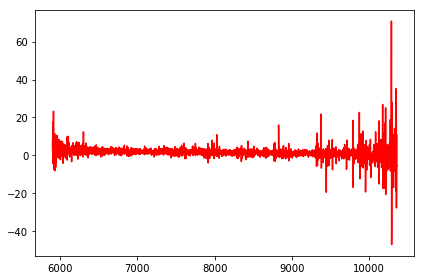

In [248]:
x = wlen_plate3586_fiber1000_exposure08
y = flux_plate3586_fiber1000_exposure08
plt.plot(x,y,c='r')
plt.tight_layout()
plt.show()

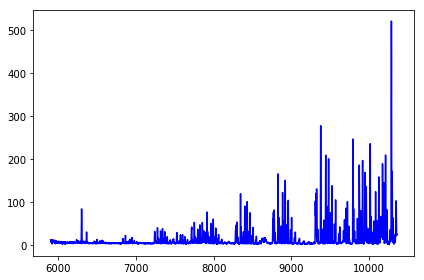

In [245]:
x = wlen_plate3586_fiber1000_exposure08
y = sky_plate3586_fiber1000_exposure08
plt.plot(x,y,c = 'b')
plt.tight_layout()
plt.show()

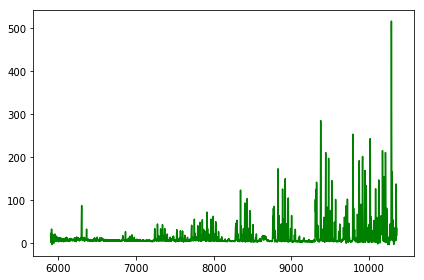

In [247]:
x = wlen_plate3586_fiber1000_exposure08
y = sky_plate3586_fiber1000_exposure08 + flux_plate3586_fiber1000_exposure08 
plt.plot(x,y,c = 'g')
plt.tight_layout()
plt.show()

In [228]:
data_plate3586_fiber1000_exposure08.shape

(3154,)

Wavelength of a particular integral pixel.

In [200]:
spec.fiducial_loglam[100]

3.554100305027835

Bounding wavelength range

In [198]:
10**spec.fiducial_loglam[[0,-1]]

array([ 3500.26      , 10568.18251472])